## Assignment Week 5

This week we are using numpy and matplotlib

In [1]:
# Start by loading the relevant libraries
import numpy as np

### Numpy: Magic Square

A <A HREF="https://en.wikipedia.org/wiki/Magic_square">magic square</A> is a matrix in which the sum of all rows, columns and diagonals are the same.
You can verify this fact for the matrix below by:
  * calculating an array containing the sums of all rows
  * calculate the minimum and maximum of this array
  * calculating an array containing the sum of all columns
  * calculate the minimum and maximum of this array
  * calculating the sum of both diagonals
  * check that both minimums and maximums and diagonals are the same value.

```python
msquare = np.array([
    [17, 24,  1,  8, 15],
    [23,  5,  7, 14, 16],
    [ 4,  6, 13, 20, 22],
    [10, 12, 19, 21,  3],
    [11, 18, 25,  2,  9]])
```

**Assignment 5.1**

Write a function **is_magic_square()** that takes a matrix as input and returns **True** if the matrix is a magic square and **False** otherwise. Use the matrix above to test your function.

*Hint*: Use np.diag and np.fliplr to get the diagonals of a matrix.


In [2]:
# Start by defining the test matrix
msquare = np.array([
    [17, 24,  1,  8, 15],
    [23,  5,  7, 14, 16],
    [ 4,  6, 13, 20, 22],
    [10, 12, 19, 21,  3],
    [11, 18, 25,  2,  9]])

In [3]:
# Recall that we can calculate the sum of the rows and coloums using
print("Sum per column =", msquare.sum(axis=0)) 
print("Sum per row =", msquare.sum(axis=1))

# We can use this to check the max and the min 
print("Max of the sum per column =", msquare.sum(axis=0).max())
print("Min of the sum per column =", msquare.sum(axis=0).min())

# We can use the np.diag function to find the diagonal of the matrix
print("The diagonal =", np.diag(msquare))
# Finding the sum is then easy
print("The sum of the diagnal =", np.diag(msquare).sum())

# By flipping the matrix we find the second diagonal
print("The second diagonal =", np.diag(np.fliplr(msquare)))

# And again print the sum
print("The sum of the second diagonal =", np.diag(np.fliplr(msquare)).sum())



Sum per column = [65 65 65 65 65]
Sum per row = [65 65 65 65 65]
Max of the sum per column = 65
Min of the sum per column = 65
The diagonal = [17  5 13 21  9]
The sum of the diagnal = 65
The second diagonal = [15 14 13 12 11]
The sum of the second diagonal = 65


In [5]:
# Finally we can write the asked function
def is_magic_square(m):
    """Check if a matrix is magic square by calculating the sum of each row, column and diagonal and \
    checking if they are all the same"""
    if ( m.sum(axis=0).max() == m.sum(axis=0).min() ) & \
       ( m.sum(axis=1).max() == m.sum(axis=1).min() ) & \
       ( m.sum(axis=0).max() == np.diag(m).sum() ) & \
       ( m.sum(axis=0).max() == np.diag(np.fliplr(m)).sum() ):  
            return True                                               
    return False                                                      

is_magic_square(msquare)

True

### Generating Magic Squares

The above function can be used in a (crude) method to generate magic squares

**Assignment 5.2**

Write a function **generateMagicSquare()** that generates a 3x3 magic square (containing numbers 1...9). 

Use the following algorithm:

  * Use the function **is_magic_square()** from the previous question to check if a matrix is a valid magic square or not.
  * Generate random 3x3 squares filled with the exact numbers 1..9 in some order and check if that matrix is a magic square. If so, print the magic square.
  
  * You may need to generate 100,000 matrices to find one that is a magic square (by chance).
  
*Hint*: Use np.random.permutation to generate a random permutation of an array.

In [6]:
# We can generate a random 3 by matrix using
# Note: we first generate a flat array, permutate that and then reshape
#       can you think why? What happens if we first reshape and then permutate?
maybe_msquare = (np.arange(9) + 1) 
maybe_square = np.random.permutation(maybe_msquare)
maybe_square.reshape((3,3))

array([[5, 2, 8],
       [4, 9, 6],
       [7, 3, 1]])

In [7]:
# We can use the above method to generate permutations in the asked function.
# Note that we use an argument that limits the number of iterations
def generateMagicSquare(num):
    maybe_msquare = (np.arange(9) + 1)                # First generate a array with the correct values
    for i in range(num):                              # then start permutating and checking in for loop
        maybe_square = np.random.permutation(maybe_msquare).reshape((3,3))
        if is_magic_square(maybe_square):
            print("The following magic square has been found:")
            print(maybe_square)
            break
        if i == (num - 1):
            print("No solution found!")
            
generateMagicSquare(10)
generateMagicSquare(100000)

        

No solution found!
The following magic square has been found:
[[8 3 4]
 [1 5 9]
 [6 7 2]]


In [8]:
# An alternative solution without the number of itterations as argument (be careful!)
def generateMagicSquareToo():
    maybe_msquare = (np.arange(9) + 1)
    count = 1
    while True:
        maybe_square = np.random.permutation(maybe_msquare).reshape((3,3))
        if is_magic_square(maybe_square):
            print("The following magic square has been found:")
            print(maybe_square)
            print("It took %i iterations to find this magic square" % count)
            break
        count += 1

generateMagicSquareToo()

The following magic square has been found:
[[8 3 4]
 [1 5 9]
 [6 7 2]]
It took 71966 iterations to find this magic square


### Matplotlib: Functions

In [11]:
# Also make sure that you have the correct libraries loaded here

%matplotlib inline

import matplotlib.pyplot as plt

### More grading

This question continues from the exercise made in class (see file 'Week5_numpy_class.ipynb' and 'Week5_numpy_class-s.ipynb'). We quickly recreate the dataset here, see the aforementioned files for details.



In [12]:
# create students and grades arrays, using random grades
students = np.array(['Anne', 'Bob', 'Mary', 'John', 'Julia', 'Mike', 'Susan', 'Zach'])
grades = np.random.rand( 8,20 )* 6 + 4

# create an array with the average grades per student 
avg_grades = grades.mean(axis=1)

# create a masked array where we mask away all grades below 5.8
masked_grades = np.ma.masked_array( grades, grades < 5.8 )

# calculate the averages per student
avg_grades = masked_grades.mean( axis = 1 ) 

# print the array to see what we have
avg_grades

masked_array(data = [7.487899795747729 8.284329293007918 7.776006943293143 7.936047639242565
 7.83629935166438 7.925469624976372 7.638069591050232 8.012506763219093],
             mask = [False False False False False False False False],
       fill_value = 1e+20)

 **Assignment 5.3**

Using the above data, do the following:

  1. Plot the avarage grade per student in a bar chart, set the axis and labels accordingly.
  2. Plot the average grades for each of the 20 assignments.
  3. Try to fit a line to this line and try to predict the average grades for the next assignment. Plot the result.
     
     *Hint* Use np.polyfit() to find a fitting function. Use np.polyval() to evaluate a polynomial. How does the degree of the polynomial effect the fitting?

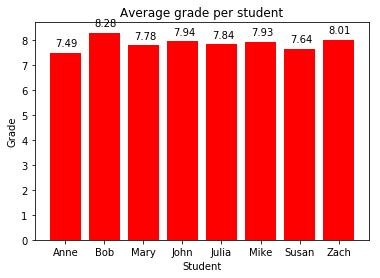

In [13]:
# 5.3.1 plot the averages of each student in a bar chart
plt.bar( np.arange( avg_grades.shape[0]), avg_grades, align='center', color='red' )

# Nice labels on the x-axis
plt.xticks( np.arange( len(students) ), students)

# Give the bar a title
plt.title("Average grade per student")

# Label the axis
plt.xlabel("Student")
plt.ylabel("Grade")

# Put the actual grade on top of the bars, for clarity
for (i, grade) in enumerate( avg_grades ):
    plt.text( i - 0.25, grade + 0.25, "%.2f" % (grade) )

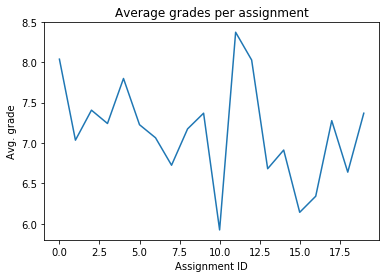

In [14]:
# 5.3.2 plot the average grade of each of the assigments

# get the average grade per assignment. Use axis=0, so average over all rows, column-by-column.
avg_grades = grades.mean(axis = 0)

# Plot the result
plt.plot( np.arange(20), avg_grades )

plt.title("Average grades per assignment")
plt.xlabel("Assignment ID")
plt.ylabel("Avg. grade")

The predicted average grade of the next assignment is 7.78


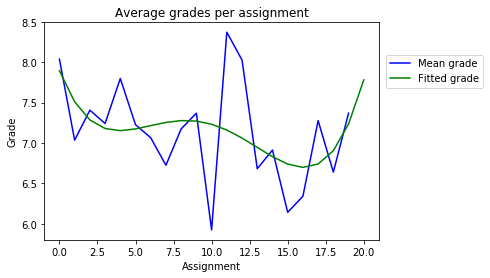

In [15]:
# 5.3.3 Try to fit a line to this line and 
# try to predict the average grades for the next assignment. 
# Plot the result

# the degree of the fitting polynomial
ndeg = 4
nassignments = len(avg_grades)

# Use polyfit to find a fitting polynomial, i.e. with degree 3 or 4 (for my random data)
# Poly will contain the coefficients of the found polynomial
poly = np.polyfit( np.arange(nassignments), avg_grades, ndeg)

# x-values and y-values of the polyfit. The prediction looks one assignment further.
# Use polyval to use the found coefficients in the polynomial
x_pred = np.arange(nassignments + 1)
y_pred = np.polyval(poly, x_pred)

# Plot both the orginal and the fitting function, including prediction
plt.plot( np.arange(nassignments) , avg_grades, color='Blue', label='Mean grade')
plt.plot( x_pred, y_pred, color='Green', label='Fitted grade')

plt.title('Average grades per assignment')
plt.xlabel('Assignment')
plt.ylabel('Grade')

# Put a legend
plt.legend( loc=(1.02, 0.7) )

print("The predicted average grade of the next assignment is %.2f" % y_pred[nassignments])

# Note: with random grades a prediction does not make much sense :-)